<a href="https://colab.research.google.com/github/klein-mask/signate/blob/main/img_10_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is image classify 10 labels from signate exercises. 

## datasets
[signate competition](https://signate.jp/competitions/133/data)

## use model

I implement "vgg16 + BatchNormalization" as a model from scratch.

## Referenced site
- https://tat-pytone.hatenablog.com/entry/2019/08/02/103907
- https://aidiary.hatenablog.com/entry/20161120/1479640534
- https://qiita.com/tsekine2/items/e95d1cf704247dd3df7b
- https://qiita.com/koshian2/items/04853466d77bab360c9d
- https://qiita.com/koshian2/items/f4917b1e6c944674fb80

## 0. mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_path = '/content/drive/MyDrive/ml/signate/img_10_label'
"""
import zipfile

with zipfile.ZipFile(f'{project_path}/train_images.zip') as train_zip:
    train_zip.extractall(project_path)

with zipfile.ZipFile(f'{project_path}/test_images.zip') as test_zip:
    test_zip.extractall(project_path)
"""

"\nimport zipfile\n\nwith zipfile.ZipFile(f'{project_path}/train_images.zip') as train_zip:\n    train_zip.extractall(project_path)\n\nwith zipfile.ZipFile(f'{project_path}/test_images.zip') as test_zip:\n    test_zip.extractall(project_path)\n"

## 1. import modules

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from natsort import natsorted

## 2. load images and convert RGB ndarray

In [ ]:
train_files = natsorted(glob.glob(f'{project_path}/train_images/*.jpg'))
test_files = natsorted(glob.glob(f'{project_path}/test_images/*.jpg'))


def jpg_2_ndarray(files):
    tmp = []
    for i, file in enumerate(files):
        if i < 100:
            print(file)
        img = Image.open(file).convert('RGB')
        d = np.asarray(img)
        tmp.append(d)
    return np.array(tmp).astype('float32') / 255.0

train = jpg_2_ndarray(train_files)
test = jpg_2_ndarray(test_files)

(5000, 96, 96, 3)
(8000, 96, 96, 3)
(96, 96, 3)
(96, 96, 3)


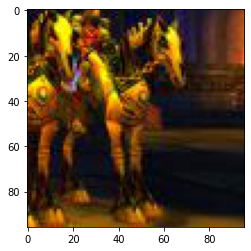

In [ ]:
# check
print(train.shape)
print(test.shape)
print(train[0].shape)
print(test[0].shape)
plt.imshow(train[3])

- image size = 96 * 96 * 3(channel) 
- train data len = 5000
- test data len = 8000

## 3. load train labels

In [ ]:
import pandas as pd

train_master = pd.read_csv(f'{project_path}/train_master.tsv', delimiter='\t')

In [ ]:
y = train_master['label_id'].values

In [ ]:
print(y.shape)
print(y)

(5000,)
[1 5 1 ... 1 7 5]


In [ ]:
from keras.utils import to_categorical

y = to_categorical(y)

In [ ]:
y.shape

(5000, 10)

## 4. train data split to train and validate

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=0.2)

In [ ]:
X_train.shape

(4000, 96, 96, 3)

## 5. create model

In [ ]:
kernel_size = (3, 3)
input_shape = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(64, kernel_size, padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(128, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(256, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, kernel_size, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
batch_size = 64
epochs = 20

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))


Epoch 1/20
63/63 [==============================] - 24s 231ms/step - loss: 3.2901 - accuracy: 0.1019 - val_loss: 2.3104 - val_accuracy: 0.0970
Epoch 2/20
63/63 [==============================] - 13s 203ms/step - loss: 2.2361 - accuracy: 0.1366 - val_loss: 2.3372 - val_accuracy: 0.1250
Epoch 3/20
63/63 [==============================] - 13s 205ms/step - loss: 2.0680 - accuracy: 0.1921 - val_loss: 3.4577 - val_accuracy: 0.0950
Epoch 4/20
63/63 [==============================] - 13s 207ms/step - loss: 1.8115 - accuracy: 0.2570 - val_loss: 5.7957 - val_accuracy: 0.0950
Epoch 5/20
63/63 [==============================] - 13s 209ms/step - loss: 1.7126 - accuracy: 0.2813 - val_loss: 5.0567 - val_accuracy: 0.1120
Epoch 6/20
63/63 [==============================] - 13s 212ms/step - loss: 1.6797 - accuracy: 0.3058 - val_loss: 4.9471 - val_accuracy: 0.1110
Epoch 7/20
63/63 [==============================] - 13s 215ms/step - loss: 1.6463 - accuracy: 0.3162 - val_loss: 1.9472 - val_accuracy: 0.2600

## 6. evaluate and prediction data

In [ ]:
test_loss, test_acc = model.evaluate(X_valid, y_valid, verbose=0)

In [ ]:
y_valid_pred = model.predict(X_valid)

In [ ]:
y_valid_pred.shape

In [ ]:
y_valid_pred[0]

In [ ]:
plt.imshow(X_valid[4])
print(np.argmax(y_valid_pred[4]))